# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

**Proceso a seguir para completar el completar el proyecto.**

1. Comenzaré por descargar los archivos de excel para darle un vistazo a las tablas y entender lo que sus datos nos muestran.
2. Posteriormente inportaré las bases al NoteBbook para revisar su estructura y validar: tipos de datos, valores repetidos, valores ausentes y si es necesario corregir datos.
3. Una vez que las tablas estén limpias podré empezar con el análisis el cual podrá ser más fácil si uno todas las tablas con las columnas necesarias.
4. Con base en ese df nuevo, realizar mis gráficas para así responder a las hipótesis solicitadas.

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Cargar datos

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
menssages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Al ser una tabla muy pequeña no existen valores ausentes y tosos los tidos de datos son correctos**

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [5]:
users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.sample(10)



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
436,1436,Jennine,Kinney,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-26,ultimate,NaN
33,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,NaN
216,1216,Reita,Atkins,29,"San Francisco-Oakland-Berkeley, CA MSA",2018-06-19,surf,NaN
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,NaN
370,1370,Nenita,Vasquez,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-09-12,ultimate,NaN
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaN
127,1127,Marchelle,Brock,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaN
128,1128,Lucius,Fernandez,41,"Knoxville, TN MSA",2018-01-25,ultimate,NaN
133,1133,Larry,Barr,50,"Cincinnati, OH-KY-IN MSA",2018-07-21,ultimate,NaN
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**En éste df noto que existen muchos datos ausentes los cuales corresponden a los usuarios que actualmente cuentan con un plan activo, podriamos llenar esos datos con una etiqueta para poder categorizarlos y realizar análisis con ellos, adicional podemos cambiar el tipo de dato de la columna 'reg_date' a datatime para poder trabajar con el y convertir 'user_id' a object.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

*Cambiamos el tipo de dato de la columna 'reg_date' a datetime y user_id a object*

In [7]:
users['user_id'] = users['user_id'].astype(str)
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users.info()
                                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

*Sustituimos los valores ausentes por 'active' que indica que el plan del usuario está activo*

In [8]:
users['churn_date']= users['churn_date'].fillna('active')


users.info()
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
162,1162,Mark,Farley,20,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,ultimate,active
406,1406,Noble,Jefferson,54,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-03-04,surf,active
114,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,active
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,active
113,1113,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,active
349,1349,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,active
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,active
345,1345,Pasquale,Caldwell,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,surf,active
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,active
209,1209,Garret,Paul,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-28,surf,active


## Llamadas

In [9]:
calls.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
calls.sample(10)



,id,user_id,call_date,duration
22839,1082_1006,1082,2018-08-01,0.00
5616,1027_159,1027,2018-09-24,11.45
110902,1390_351,1390,2018-04-08,0.00
5303,1023_2,1023,2018-07-22,3.00
63530,1231_244,1231,2018-06-27,13.11
128257,1460_356,1460,2018-11-06,7.93
63110,1228_34,1228,2018-10-30,9.18
54569,1196_458,1196,2018-06-15,10.04
2077,1009_499,1009,2018-07-26,4.73
79783,1285_285,1285,2018-10-09,3.53


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Noto que no hay valores ausentes pero si podrímos hacer cambios en los tipos de datos en las columnas 'user_id' y 'call_data' para facilitar su análisis.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
calls['user_id']= calls['user_id'].astype(str)
calls['call_date'] = pd.to_datetime(calls['call_date'], errors= 'coerce')

calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
48345,1174_322,1174,2018-10-12,17.17
20692,1077_659,1077,2018-04-04,16.72
75010,1264_351,1264,2018-12-25,12.37
69085,1247_418,1247,2018-12-01,6.82
72492,1257_232,1257,2018-10-12,12.27
19844,1076_185,1076,2018-11-23,7.78
52942,1191_90,1191,2018-08-09,6.39
18412,1071_192,1071,2018-07-22,0.00
106991,1380_15,1380,2018-12-03,14.44
102353,1362_1130,1362,2018-12-01,7.71


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [12]:
menssages.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
menssages.sample(10)



,id,user_id,message_date
59370,1374_544,1374,2018-11-11
61391,1384_509,1384,2018-09-14
70080,1455_16,1455,2018-11-29
14927,1100_249,1100,2018-11-17
1562,1015_561,1015,2018-12-26
75885,1494_123,1494,2018-10-01
75136,1489_211,1489,2018-10-31
7130,1058_196,1058,2018-12-11
70215,1456_129,1456,2018-07-24
40408,1261_35,1261,2018-08-10


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Se observa que no existen valores nulos y aunque tenemos valores repetidos en la columna user_id no podemos eliminarlos ya que cada fila es diferente. Sólo podemos cambiar los tipos de datos de user_id y message_date.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
menssages['user_id'] = menssages['user_id'].astype(str)
menssages['message_date'] = pd.to_datetime(menssages['message_date'], errors = 'coerce')

menssages.info()
menssages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
2593,1028_516,1028,2018-09-16
55398,1348_174,1348,2018-12-20
9008,1066_181,1066,2018-08-26
56967,1362_32,1362,2018-07-11
20759,1131_98,1131,2018-07-09
33507,1211_183,1211,2018-07-14
39319,1255_537,1255,2018-09-15
74416,1476_183,1476,2018-11-03
65213,1419_22,1419,2018-12-12
72866,1470_494,1470,2018-12-06


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [15]:
internet.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
internet.sample(10)



,id,user_id,session_date,mb_used
83614,1390_169,1390,2018-10-19,639.84
53793,1243_95,1243,2018-12-15,0.00
32855,1147_508,1147,2018-06-29,768.52
44709,1198_83,1198,2018-11-03,757.08
14611,1066_507,1066,2018-05-08,47.42
86138,1400_272,1400,2018-10-08,542.18
73569,1346_150,1346,2018-12-05,395.73
20151,1090_391,1090,2018-07-03,658.34
28103,1128_257,1128,2018-12-23,0.00
100194,1474_551,1474,2018-10-10,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Se observa que no existen valores nulos y aunque tenemos valores repetidos en la columna user_id no podemos eliminarlos ya que cada fila es diferente. Sólo podemos cambiar los tipos de datos de user_id y session_date**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
internet['user_id'] = internet['user_id'].astype(str)
internet['session_date'] = pd.to_datetime(internet['session_date'], errors = 'coerce')



internet.info()
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
44862,1199_75,1199,2018-10-21,228.61
49542,1222_41,1222,2018-08-30,202.79
92135,1428_15,1428,2018-11-29,230.38
68311,1318_251,1318,2018-10-12,279.66
23040,1106_297,1106,2018-12-30,576.62
16475,1073_416,1073,2018-09-02,0.00
5873,1032_34,1032,2018-11-21,454.49
83925,1391_169,1391,2018-12-31,233.88
60524,1276_8,1276,2018-11-30,37.08
61594,1280_97,1280,2018-11-18,775.09


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [18]:
plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [19]:
# Primero accedemos al mes de la fecha
calls['month'] = calls['call_date'].dt.month
# Agrupamos el usuario y el mes extraido para contar el número de llamadas con el id, 
#adicional nombramos la columna del resultado para un mayor entendimineto de la tabla
calls_per_user_month = calls.groupby(['user_id', 'month']).agg(number_of_calls = ('id', 'count')).reset_index()

calls_per_user_month



,user_id,month,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [20]:
# Primero accedemos al mes de la fecha
calls['month'] = calls['call_date'].dt.month
# Agrupamos por usurio, mes y sumamos los minutos, adicional nombramos la columna de la suma
minuts_per_user_month = calls.groupby(['user_id', 'month']).agg(number_of_minuts= ('duration', 'sum')).reset_index()

minuts_per_user_month



,user_id,month,number_of_minuts
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [21]:
# Accedemos al mes de la fecha
menssages['month'] = menssages['message_date'].dt.month
# Agrupamos por usuario, mes y contamos los mensajes por el id
msg_per_user_month = menssages.groupby(['user_id', 'month']).agg(number_of_msg = ('id','count')).reset_index()

msg_per_user_month



,user_id,month,number_of_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [22]:
#Accedemos al mes de la fecha
internet['month'] = internet['session_date'].dt.month
#Agrupamos por usuario, mes, y sumamos los mb usados por mes
mb_per_user_month = internet.groupby(['user_id','month']).agg(number_of_mb = ('mb_used', 'sum')).reset_index()

mb_per_user_month


,user_id,month,number_of_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [23]:
# La unión de las tablas la haremos en tres partes
#Primero uniremos llamadas con minutos
call_min = pd.merge(calls_per_user_month, minuts_per_user_month, on= ('user_id', 'month'), how= 'outer')
#Ahora uniremos la tabla call_min con mensajes
call_min_msg = pd.merge(call_min, msg_per_user_month, on= ('user_id', 'month'), how= 'outer')
#Por último uniremos las tablas call_min_msg con internet para tener toda la información completa
monthly_purchases = pd.merge(call_min_msg, mb_per_user_month, on= ('user_id', 'month'), how = 'outer')
#Adicional llenaremos todos los datos nulos que puedan existir con fillna(0)

monthly_purchases = monthly_purchases.fillna(0)

monthly_purchases


,user_id,month,number_of_calls,number_of_minuts,number_of_msg,number_of_mb
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,0.0,0.00,61.0,13039.91
2289,1361,5,0.0,0.00,2.0,1519.69
2290,1482,10,0.0,0.00,2.0,0.00
2291,1108,12,0.0,0.00,0.0,233.17


In [24]:
#Unimos la tabla monthly_purchases con usuarios para identificar el plan de cada usuario
service_rates= pd.merge(monthly_purchases, users, on= ['user_id'], how= 'outer')
#Eliminamos columnas no necesarias
col_drop = ['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date']
service_rates = service_rates.drop(labels= col_drop, axis='columns')
#agregamos los datos del plan 
service_rates = pd.merge(service_rates, plans, left_on='plan', right_on='plan_name', how='left')
#eliminamos columnas
service_rates = service_rates.drop('plan_name', axis='columns')

service_rates




,user_id,month,number_of_calls,number_of_minuts,number_of_msg,number_of_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9.0,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10.0,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11.0,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,50,15360,500,20,10,0.03,0.03
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,1000,30720,3000,70,7,0.01,0.01


In [25]:
# Validamos la cantidad de datos nulos que nos aparecen 
print(service_rates.isna().sum())

user_id                   0
month                    10
number_of_calls          10
number_of_minuts         10
number_of_msg            10
number_of_mb             10
plan                      0
messages_included         0
mb_per_month_included     0
minutes_included          0
usd_monthly_pay           0
usd_per_gb                0
usd_per_message           0
usd_per_minute            0
dtype: int64


In [26]:
#Al validar que son muy pocos los datos nulos y que son usuarios que no registraron ningún consumo, los eliminaremos lo cual no perjuducará el análisis
service_rates.dropna(inplace= True)
print(service_rates.isna().sum())
service_rates

user_id                  0
month                    0
number_of_calls          0
number_of_minuts         0
number_of_msg            0
number_of_mb             0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dtype: int64


,user_id,month,number_of_calls,number_of_minuts,number_of_msg,number_of_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9.0,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10.0,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11.0,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12.0,0.0,0.00,78.0,36730.05,ultimate,1000,30720,3000,70,7,0.01,0.01
2289,1349,10.0,0.0,0.00,76.0,13093.55,surf,50,15360,500,20,10,0.03,0.03
2290,1349,11.0,0.0,0.00,72.0,17128.26,surf,50,15360,500,20,10,0.03,0.03
2291,1349,12.0,0.0,0.00,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [27]:
# Calculamos los servicios excedidos por usuario 
service_rates['messages_exceeded'] = (service_rates['number_of_msg'] - service_rates['messages_included']).clip(lower=0)
service_rates['minutes_exceeded'] = (service_rates['number_of_minuts']- service_rates['minutes_included']).clip(lower=0)
service_rates['mb_exceeded'] = (service_rates['number_of_mb']- service_rates['mb_per_month_included']).clip(lower=0)

# Calculamos el monto extra que debe cubrir el usuario 

service_rates['add_cost_msg'] = (service_rates['messages_exceeded'] * service_rates['usd_per_message'])
service_rates['add_cost_min'] = (service_rates['minutes_exceeded'] * service_rates['usd_per_minute'])
service_rates['add_cost_mb'] = (service_rates['mb_exceeded'] * service_rates['usd_per_gb'])
#Convertimos los mb en gb
service_rates['mb_exceeded'] = np.ceil(service_rates['mb_exceeded'] / 1024)
service_rates['add_cost_gb'] = (service_rates['mb_exceeded']* service_rates['usd_per_gb'])

#Calculamos los costos totales adicionales por usuario

service_rates['add_cost_total'] = (service_rates['add_cost_min'] + service_rates['add_cost_msg'] + 
                                   service_rates['add_cost_gb'])
service_rates['add_cost_total'] = service_rates['add_cost_total'].round(2)

#Convertimos algunas columnas en (int) para un mejor entendimiento de sus datos
service_rates['month'] = service_rates['month'].astype(int)
service_rates['number_of_calls'] = service_rates['number_of_calls'].astype(int)
service_rates['number_of_msg'] = service_rates['number_of_msg'].astype(int)
service_rates['messages_exceeded'] = service_rates['messages_exceeded'].astype(int)

#Reordenaremos las columnas para tener un mejor entendimiento de los datos

service_rates_organized = [
    'user_id',
    'plan',
    'usd_monthly_pay',
    'month',
    'number_of_calls',
    'minutes_included', 
    'number_of_minuts',
    'minutes_exceeded',
    'usd_per_minute',
    'add_cost_min',     
    'messages_included',
    'number_of_msg', 
    'messages_exceeded',
    'usd_per_message',
    'add_cost_msg',
    'mb_per_month_included',      
    'number_of_mb',
    'mb_exceeded',  
    'usd_per_gb',
    'add_cost_mb',
    'add_cost_gb',
    'add_cost_total'
]

service_rates = service_rates[service_rates_organized] 

service_rates.sample(20)




,user_id,plan,usd_monthly_pay,month,number_of_calls,minutes_included,number_of_minuts,minutes_exceeded,usd_per_minute,add_cost_min,...,messages_exceeded,usd_per_message,add_cost_msg,mb_per_month_included,number_of_mb,mb_exceeded,usd_per_gb,add_cost_mb,add_cost_gb,add_cost_total
256,1059,ultimate,70,7,100,3000,672.10,0.00,0.01,0.0000,...,0,0.01,0.00,30720,13367.17,0.0,7,0.00,0.0,0.00
101,1028,ultimate,70,10,6,3000,34.02,0.00,0.01,0.0000,...,0,0.01,0.00,30720,46595.33,16.0,7,111127.31,112.0,112.00
1216,1261,surf,20,8,67,500,454.75,0.00,0.03,0.0000,...,0,0.03,0.00,15360,17556.64,3.0,10,21966.40,30.0,30.00
2078,1458,ultimate,70,7,5,3000,13.95,0.00,0.01,0.0000,...,0,0.01,0.00,30720,4700.98,0.0,7,0.00,0.0,0.00
1391,1310,surf,20,12,18,500,117.35,0.00,0.03,0.0000,...,0,0.03,0.00,15360,20970.26,6.0,10,56102.60,60.0,60.00
1704,1373,ultimate,70,10,107,3000,738.13,0.00,0.01,0.0000,...,0,0.01,0.00,30720,32574.06,2.0,7,12978.42,14.0,14.00
1143,1249,ultimate,70,8,96,3000,518.52,0.00,0.01,0.0000,...,0,0.01,0.00,30720,18809.16,0.0,7,0.00,0.0,0.00
823,1175,surf,20,10,101,500,663.84,163.84,0.03,4.9152,...,0,0.03,0.00,15360,22562.08,8.0,10,72020.80,80.0,84.92
1646,1362,surf,20,1,42,500,278.85,0.00,0.03,0.0000,...,0,0.03,0.00,15360,7894.79,0.0,10,0.00,0.0,0.00
13,1004,surf,20,8,49,500,334.86,0.00,0.03,0.0000,...,0,0.03,0.00,15360,27981.74,13.0,10,126217.40,130.0,130.00


In [28]:
# Mostramos la cantidad total adicional que se le cobrará al usuario por los servicios excedidos en su plan
total_cost = service_rates.groupby(['user_id', 'month']).agg(total_cost_per_user = ('add_cost_total','sum')).reset_index()

total_cost.head(20)

,user_id,month,total_cost_per_user
0,1000,12,0.00
1,1001,8,0.00
2,1001,9,0.00
3,1001,10,70.09
4,1001,11,40.00
5,1001,12,40.00
6,1002,10,0.00
7,1002,11,40.00
8,1002,12,0.00
9,1003,12,136.23


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [29]:
# Uniremos las tablas calls y planes para sacar el promedio mensual de duración de llamadas para cada plan
duration_calls_per_plan = pd.merge(calls, users, on= 'user_id', how= 'left')
drop_col = ['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date']
#Eliminamos columnas no necesarias
duration_calls_per_plan = duration_calls_per_plan.drop(labels= drop_col, axis= 'columns')

duration_calls_per_plan



,id,user_id,call_date,duration,month,plan
0,1000_93,1000,2018-12-27,8.52,12,ultimate
1,1000_145,1000,2018-12-27,13.66,12,ultimate
2,1000_247,1000,2018-12-27,14.48,12,ultimate
3,1000_309,1000,2018-12-28,5.76,12,ultimate
4,1000_380,1000,2018-12-30,4.22,12,ultimate
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,surf
137731,1499_200,1499,2018-10-20,10.89,10,surf
137732,1499_201,1499,2018-09-21,8.12,9,surf
137733,1499_202,1499,2018-10-10,0.37,10,surf


In [30]:
#Calculamos la duración de llamadas promedio mensual por plan
mean_duration = duration_calls_per_plan.groupby(['month', 'plan']).agg(mean_per_call = ('duration','mean')).reset_index()
mean_duration['mean_per_call'] = mean_duration['mean_per_call'].round(2)

mean_duration

,month,plan,mean_per_call
0,1,surf,6.43
1,1,ultimate,6.54
2,2,surf,6.91
3,2,ultimate,6.52
4,3,surf,6.70
5,3,ultimate,6.21
6,4,surf,6.80
7,4,ultimate,6.66
8,5,surf,6.77
9,5,ultimate,6.66


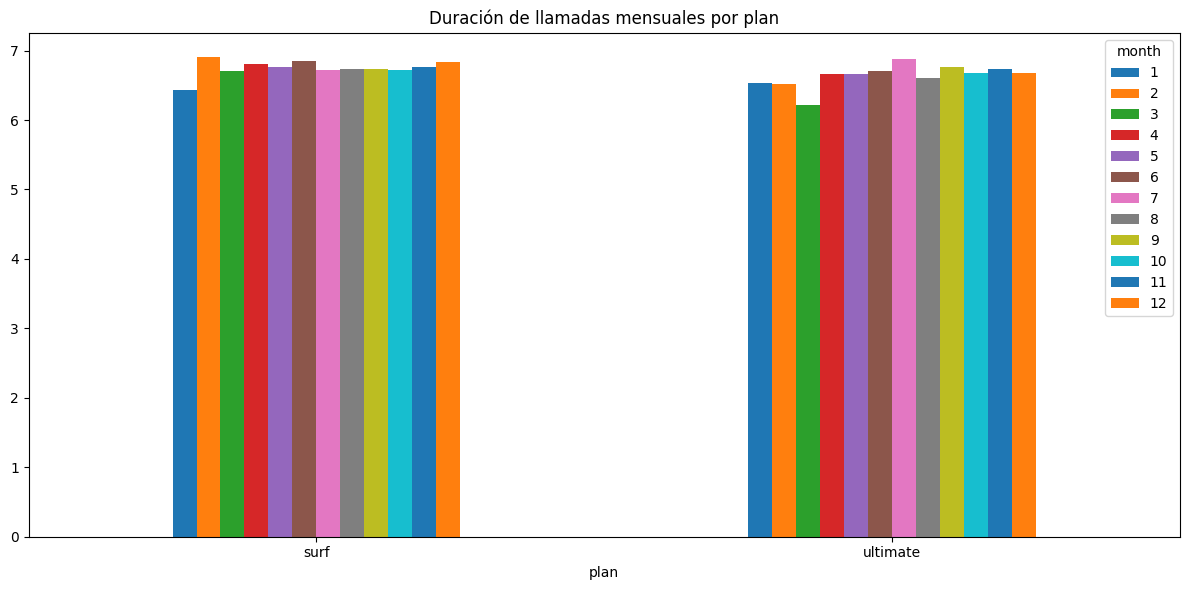

In [31]:
#Cremos el gráfico de barras con base en una tabla dinamica
mean_duration_pivot = mean_duration.pivot(index= 'plan', columns= 'month', values= 'mean_per_call')
mean_duration_pivot.plot(kind= 'bar', figsize= (12,6), rot= 0, title= 'Duración de llamadas mensuales por plan')
plt.tight_layout()
plt.show()

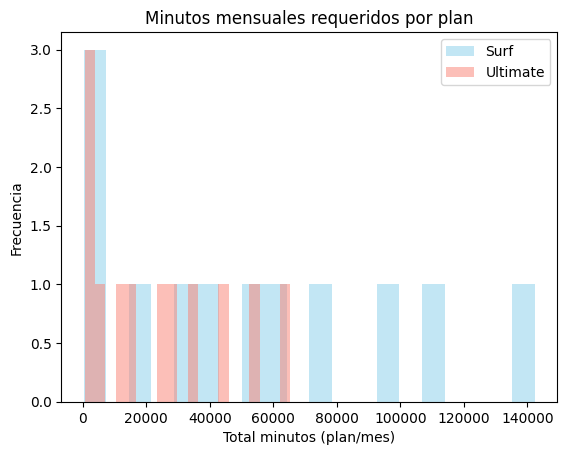

In [32]:
#Creamos un df nuevo von la información de la tabla duracion llamadas para calcular el numero total de minutos por mes y plan
minutes_needed = duration_calls_per_plan.groupby(['plan','month']).agg(minutes_required = ('duration','sum')).reset_index()
minutes_needed['minutes_required'] = minutes_needed['minutes_required'].round(2)
#Aplicamos los filtros necesarios para los hostogramas
surf = minutes_needed[minutes_needed['plan'] == 'surf']['minutes_required']
ultimate = minutes_needed[minutes_needed['plan'] == 'ultimate']['minutes_required']
#Realizamos los histogramas
plt.hist(surf, alpha= 0.5, label= 'Surf', color= 'skyblue', bins= 20)
plt.hist(ultimate, alpha= 0.5, label= 'Ultimate', color= 'salmon', bins= 20)

plt.title('Minutos mensuales requeridos por plan')
plt.xlabel('Total minutos (plan/mes)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [33]:
minutes_needed

,plan,month,minutes_required
0,surf,1,385.68
1,surf,2,2527.66
2,surf,3,7152.31
3,surf,4,16619.00
4,surf,5,29033.10
5,surf,6,39499.26
6,surf,7,51367.31
7,surf,8,62721.48
8,surf,9,75852.46
9,surf,10,96149.09


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
#Calculamos la media
mean_min = duration_calls_per_plan.groupby('plan')['duration'].mean().round(2)
#Calculamos la Varianza
var_min = duration_calls_per_plan.groupby('plan')['duration'].var().round(2)

print(f"Media de los minutos mensuales por plan: {mean_min}")
print(f"Varianza del total de minutos mensuales por plan:{var_min}")



Media de los minutos mensuales por plan: plan
surf        6.77
ultimate    6.70
Name: duration, dtype: float64
Varianza del total de minutos mensuales por plan:plan
surf        34.16
ultimate    33.96
Name: duration, dtype: float64


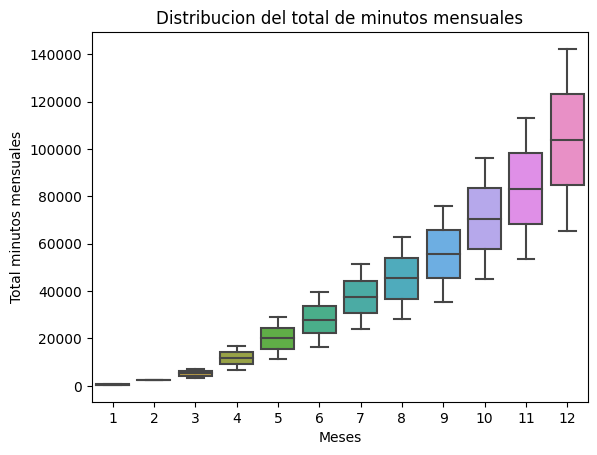

In [35]:
plt.Figure(figsize= (8,6))
sns.boxplot(data= minutes_needed, x= 'month' , y= 'minutes_required')
plt.title('Distribucion del total de minutos mensuales')
plt.xlabel('Meses')
plt.ylabel('Total minutos mensuales')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Según los gráficos obtenidos veo que el comportamiento varía en dos formas, a medida que avanza el mes incrementa el uso de minutos y también varia por plan ya que los usuarios de surf usan más minutos que los de ultimate**

### Mensajes

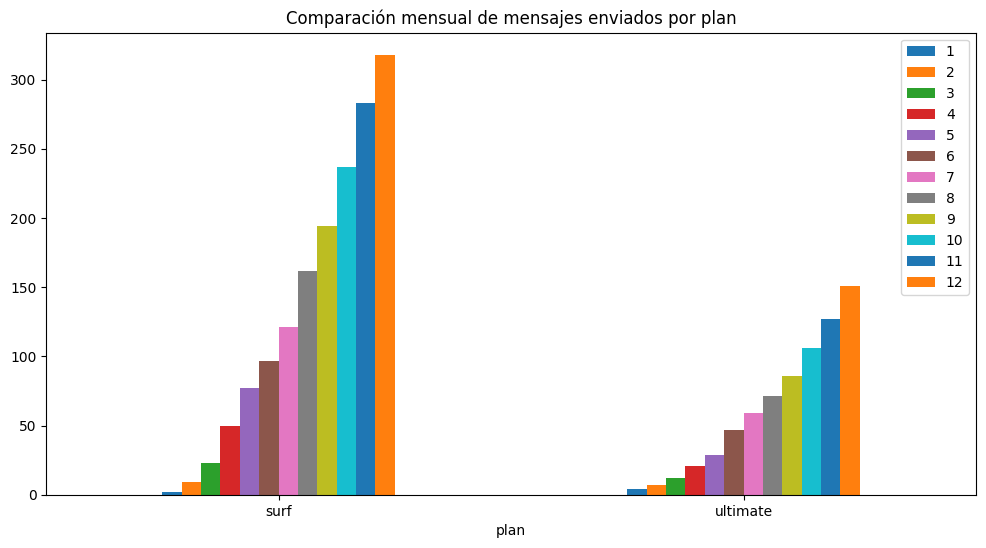

In [36]:
#Agrupamos los datos necesarios para calcular el número de mensajes por mes y plan
msg = service_rates.groupby(['plan', 'month']).agg(msg_sent = ('number_of_msg','count')).reset_index()
#Realizamos una tabla dinámica para ordenar los datos
msg_pivot = msg.pivot(index= 'plan', columns= 'month', values='msg_sent')
#Realizamos una gráfica de barras para realizar la comparación
msg_pivot.plot(kind= 'bar', figsize= (12,6), rot= 0, title= 'Comparación mensual de mensajes enviados por plan')
plt.legend()
plt.show()

In [37]:
#Calculamos la media de mensajes enviados
mean_msg= service_rates.groupby('plan')['number_of_msg'].mean()
#Calculamos la varianza de los mensajes enviados
var_msg = service_rates.groupby('plan')['number_of_msg'].var()

print(f"Media de los mensajes enviados por plan: {mean_msg}")
print(f"Varianza de los mensajes enviados por plan: {var_msg}")

Media de los mensajes enviados por plan: plan
surf        31.159568
ultimate    37.551389
Name: number_of_msg, dtype: float64
Varianza de los mensajes enviados por plan: plan
surf        1126.724522
ultimate    1208.756744
Name: number_of_msg, dtype: float64


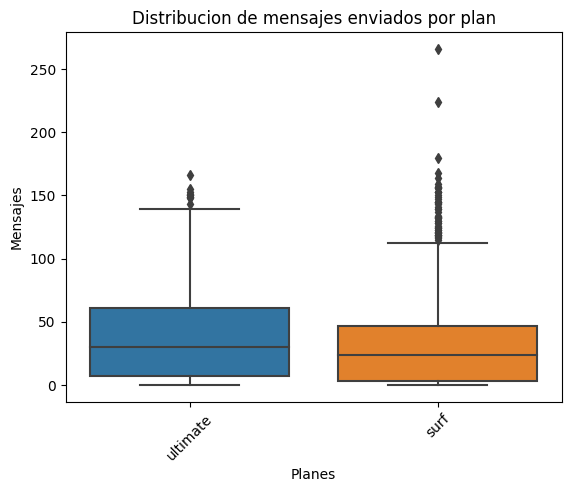

In [49]:
#Realizamos un diagrama de caja y bigote
plt.Figure(figsize= (10,6))
sns.boxplot(data= service_rates, x= 'plan', y= 'number_of_msg', palette= 'tab10' )
plt.title('Distribucion de mensajes enviados por plan')
plt.xticks(rotation=45)
plt.xlabel('Planes')
plt.ylabel('Mensajes')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Podemos notar una gran direfencia en el número de mensajes que envían los usuarios del plan Surf contra los usuarios Utimate; También notamos que para ambos casos el envío de mensajes incrementa mes con mes.**


### Internet

In [39]:
#Agrupamos los datos por plan y por mg consumnmidos para comparar la cantidad de tráfico de Internet consumido por usuarios por plan
internet = service_rates.groupby('plan').agg(trafico_de_datos_gb = ('number_of_mb','sum')).reset_index()
#Cobvertimos los mg en gb
internet['trafico_de_datos_gb'] = np.ceil(internet['trafico_de_datos_gb']/ 1024)
internet

,plan,trafico_de_datos_gb
0,surf,25436.0
1,ultimate,12105.0


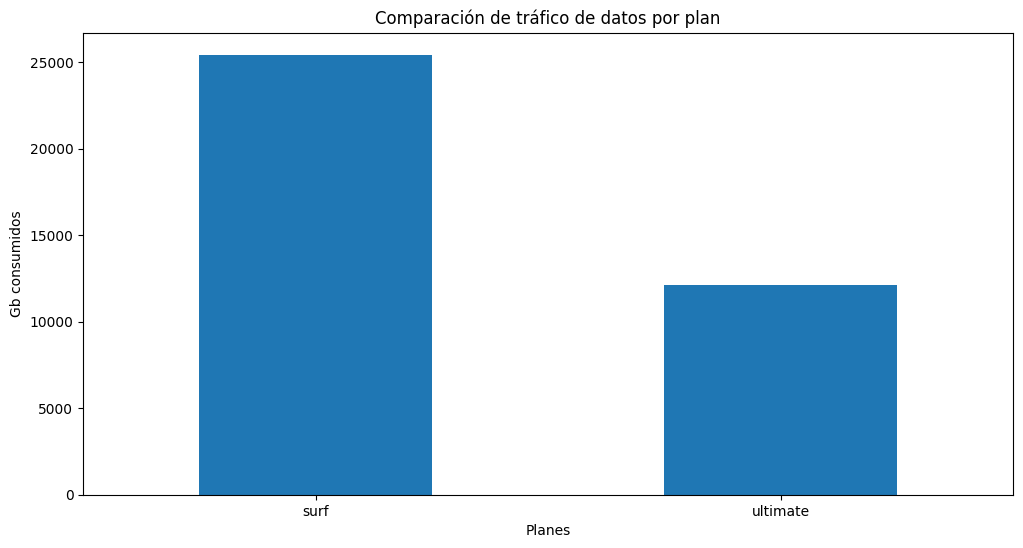

In [40]:
#Aplicamos los datos a un gráfico de barras para su análisis
internet.plot(kind= 'bar',
             x= 'plan',
             y= 'trafico_de_datos_gb',
             title= 'Comparación de tráfico de datos por plan',
             xlabel= 'Planes',
             ylabel= 'Gb consumidos',
             figsize= (12,6),
             rot= 0,
             legend= False
             )
plt.show()

In [41]:
#Calculamos la media del tráfico de datos
mean_gb= service_rates.groupby('plan')['number_of_mb'].mean()
#Calculamos la varianza del tráfico de datos
var_gb = service_rates.groupby('plan')['number_of_mb'].var()

print(f"Media del tráfico de datos por plan: {mean_gb}")
print(f"Varianza del tráfico de datos por plan: {var_gb}")

Media del tráfico de datos por plan: plan
surf        16558.283490
ultimate    17214.699694
Name: number_of_mb, dtype: float64
Varianza del tráfico de datos por plan: plan
surf        6.421640e+07
ultimate    6.165229e+07
Name: number_of_mb, dtype: float64


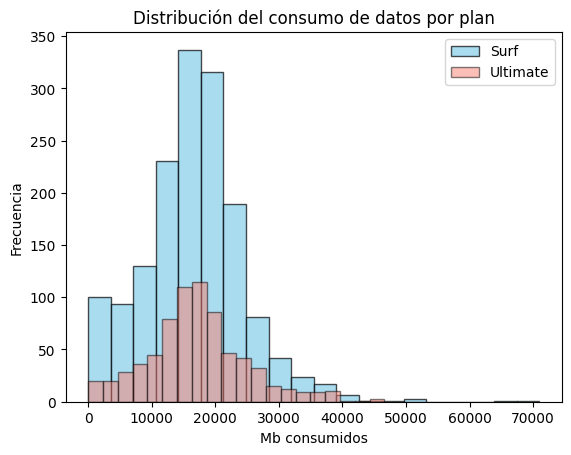

In [42]:
#Aplicaremos los datos a un histograma para ver la distribución de los datos consumidos
internet_surf = service_rates[service_rates['plan'] == 'surf']['number_of_mb']
internet_ultimate = service_rates[service_rates['plan'] == 'ultimate']['number_of_mb']

plt.hist(internet_surf, alpha= 0.7, bins= 20, label = 'Surf', color = 'skyblue', edgecolor = 'black')
plt.hist(internet_ultimate, alpha = 0.5, bins= 20, label= 'Ultimate', color = 'salmon', edgecolor = 'black')
plt.title('Distribución del consumo de datos por plan')
plt.xlabel('Mb consumidos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Claramente podemos observar que los usuarios del plan Surf utilizan más datos con respecto a los usuarios del plan Ultimate.**


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [43]:
#Calculamos los ingresos totales por plan
revenue_per_plan = service_rates.groupby(['plan']).agg(revenue = ('add_cost_total','sum')).reset_index()
revenue_per_plan

,plan,revenue
0,surf,63434.9
1,ultimate,1666.0


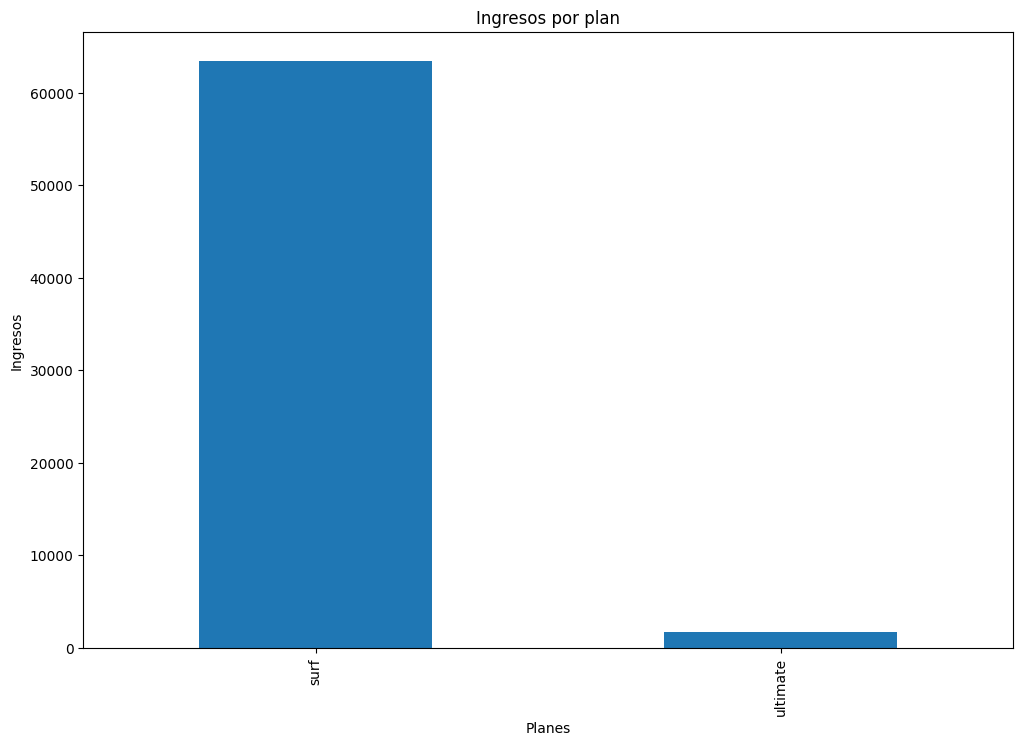

In [44]:
#Aplicamos un gráfico de barras para analizar los ingresos
revenue_per_plan.plot(kind= 'bar',
                      x= 'plan',
                      y= 'revenue',
                      title= 'Ingresos por plan',
                      figsize= (12,8),
                      xlabel= 'Planes',
                      ylabel= 'Ingresos',
                      legend=False
                      )
plt.show()

In [45]:
#Calculamos la media y la varianza de los ingresos
mean_revenue = service_rates.groupby('plan')['add_cost_total'].mean()
var_revenue = service_rates.groupby('plan')['add_cost_total'].var()

print(f"Media de ingresos por plan: {mean_revenue}")
print(f"Varianza de ingresos por plan: {var_revenue}")

Media de ingresos por plan: plan
surf        40.327336
ultimate     2.313889
Name: add_cost_total, dtype: float64
Varianza de ingresos por plan: plan
surf        3053.962093
ultimate     129.848486
Name: add_cost_total, dtype: float64


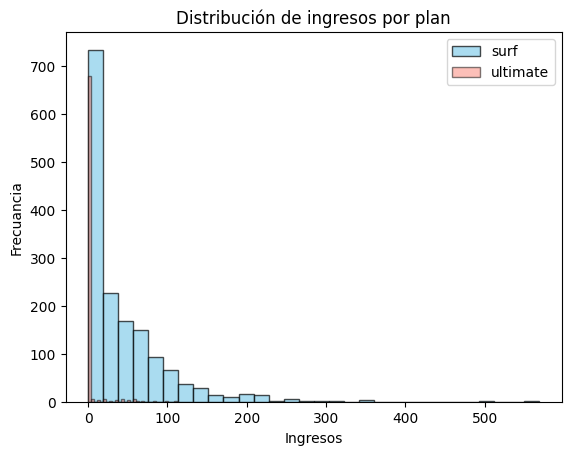

In [46]:
#Aplicamos un histograma para ver su distribución
revenue_surf = service_rates[service_rates['plan'] == 'surf']['add_cost_total']
revenue_ultimate = service_rates[service_rates['plan'] == 'ultimate']['add_cost_total']

plt.hist(revenue_surf, bins= 30, alpha= 0.7, label= 'surf', color= 'skyblue', edgecolor= 'black')
plt.hist(revenue_ultimate, bins= 30, alpha= 0.5, label= 'ultimate', color= 'salmon', edgecolor= 'black')

plt.title('Distribución de ingresos por plan')
plt.xlabel('Ingresos')
plt.ylabel('Frecuancia')
plt.legend()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Podemos ver que el paln Surf tiene mayores ingresos, lo cual pienso que se debe a que dicho plan tiene menos cantidades de servicios incluidos (Minutos, Mensajes y Megas), por lo que les es más fácil revasar el limite y por ende generar costos extras, a diferencia de el plan Utimate que su rango de servicios es más amplio y aunque genera menos ingresos por costos extras, genera más en su cuota mensual fija lo cual puede compensar los ingresos.** 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [47]:
#Identificamos los ingresos totales de ambos planes por separado 
ultimate_income= service_rates[service_rates['plan'] == 'ultimate']['add_cost_total']
surf_income = service_rates[service_rates['plan'] == 'surf']['add_cost_total']
#Determinamos el valor "t" y el "p-valor", elegimos la prueba estadística "t" con un valor alfa de 0.05
t_statistic, p_value = stats.ttest_ind(ultimate_income, surf_income)
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")



Estadístico t: -18.27839232810818
Valor p: 8.819884691298445e-70


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [48]:
#Creamos el df necesario para la prueba de hiótesis
ny_nj = pd.merge(service_rates, users, on= 'user_id', how= 'left')

col_del = ['user_id', 'usd_monthly_pay', 'month', 'number_of_calls',
       'minutes_included', 'number_of_minuts', 'minutes_exceeded',
       'usd_per_minute', 'add_cost_min', 'messages_included', 'number_of_msg',
       'messages_exceeded', 'usd_per_message', 'add_cost_msg',
       'mb_per_month_included', 'number_of_mb', 'mb_exceeded', 'usd_per_gb',
       'add_cost_mb', 'add_cost_gb', 'first_name',
       'last_name', 'age', 'reg_date', 'plan_y', 'churn_date']
ny_nj = ny_nj.drop(labels= col_del, axis='columns')

#Realizamos los filtros pra distinguir a las ciudades
income_ny_nj = ny_nj[ny_nj['city'].str.contains('New York', na=False)]
income_other_cities = ny_nj[~ny_nj['city'].str.contains('New York', na=False)]
#Realizamos la prueba de hipótesis mediente la prueba "t" con un alfa de 0.05
t_statistic, p_value = stats.ttest_ind(income_ny_nj['add_cost_total'], income_other_cities['add_cost_total'])

print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")



Estadístico t: 1.114906207304329
Valor p: 0.2650075550511557


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Para la hipótesis de que los ingresos promedio de los planes Ultimate y Surf son diferentes concuimos siguiente:**

*Estadístico t: -18.278387928183548: Nos indica la magnitud de la diferecia que existe entre los dos grupos alnalizados (ultimate vs surf), es decir que al darnos un número negativo de -18 se puede comprobar que los ingresos del plan ultiamte son significativamente más bajos que los de surf.*

*Valor p: 8.820505603061949e-70: nos indica que el valor p es mucho menor que nuestro valor alfa 0.05 por lo cual podemos rechazar la hipótesis nula, ésto significa que hay sufuciente evidenca estadistica para concluir que los ingresos promedio analizados de los planes Ultimate y Surf son diferentes.*

**Para la hipótesis de que los ingresos promedio de NY-NJ son diferentes a los de usuarios de otras regiones, concluimos lo siguiente:**

*Ya que el valor p es mayor a nuestro valor alfa de 0.05, no podemos rechazar la hipótesis nula dado que no hay una gran diferencia entre le promedio de ingresos de los usuarios de NY-NJ contra los de otros estados*

*Nuestro valor estadístico nos indica que entre los ingresos pormedios de ambos grupos, hay una ligera diferencia, lo que refuerza la idea de no rechazar la hípotesis nula.*